## PGR107 PYTHON PROGRAMMING

### Final Project

### by FRANK MILLER

### Question 1

1. Implement the following functions:
a) BMI() that takes as input a person’s height (in inches) and weight (in pounds) computes the person’s BMI and prints an assessment, as shown below.
The Body Mass Index is (weight * 703)/height2 for pounds and inches.
Indexes below 18.5 or above 25.0 are assessed as underweight and overweight, respectively; indexes in between are considered normal.
An example of inputs and output is given below: 190 is weight in pounds and 75 is height in inches.

In [1]:
# This if statement takes weight input in pounds and height input in inches.
# According to given scale, three different result is possible. 
weight = float(input("Enter weight in pounds: "))
height = float(input("Enter height in inches: "))

BMI = (weight*703)/height**2

if(BMI < 18.5):
   print("The person is underweight.")

elif(BMI >= 18.5 and BMI < 25):
   print("The person is normal.")

else:
   print("The person is overweight.")


Enter weight in pounds: 175
Enter height in inches: 75
The person is normal.


1.
b) acronym() that: takes a phrase (i.e., a string) as input and returns the acronym for the phrase. 

In [2]:
# This for loops is basically selecting the first letter of each word, converting those to uppercase
# and joining them to each other.
text = str(input("Enter text hee: "))
letters = ""
words = text.split()
for word in words:
    letters = letters + word[0]
print("The acronym is", "".join(letters).upper())

Enter text hee: Frank Miller
The acronym is FM


### Question 2

2. Collect  data  from  a  publicly  available  source  on  COVID19  and  write  an  analysis  on COVID19  infections, deaths, recoveries, etc. Explain your data clearly and support your analysis with strong visualizations. 
Note:  This is an  open-ended  question and  you  are  expected to  choose  and define  the scope  of  your  analysis  (e.g.  comparing  Nordics  vs.  Europe  vs.  world,  comparing municipalities, etc.).  Be  analytical  and  creative.  You  can  use other  supporting datasets (e.g. GDP, Health index, Life expectancy, etc.) to make your analysis more interesting too. 
Aesthetics matter, therefore, use markdowns and visualizations wisely.

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker
import seaborn as sns
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [4]:
# Reading Corona table and converting it to dataframe by pandas library
df = pd.read_csv('CoronaTable.csv', sep=',', header=None, encoding='latin-1')

'CoronaTable.csv' file is taken from a website, 'https://worldometers.info/coronavirus/' on 28th of September 2020, and an excel table created
first. After that this table is converted to a '.csv' file and a dataframe respectively. 
WORLDOMETER, Coronavirus (2020). 'https://worldometers.info/coronavirus/' on 28th of September 2020.

In [5]:
# Checking the new dataframe
df

0             1           2         3            4   \
0          Country     Continent  TotalCases  NewCases  TotalDeaths   
1    United States  NorthAmerica     7185471     45355       207538   
2            India          Asia     5816103     85919        92317   
3           Brazil  SouthAmerica     4659909     32129       139883   
4           Russia        Europe     1128836      6595        19948   
..             ...           ...         ...       ...          ...   
190     Seychelles        Africa         143       NaN          NaN   
191  Liechtenstein        Europe         116       NaN            1   
192           Laos          Asia          23       NaN          NaN   
193      Greenland        Europe          14       NaN          NaN   
194     WorldTotal         World    32402332    315247       987153   

            5               6            7                8               9   \
0    NewDeaths  TotalRecovered  ActiveCases  SeriousCritical  TotCases/1MPop   
1          942         4437575      2540358            14156           21678   
2         1144         4752991       970795             8944            4205   
3          818         4023789       496237             8318           21886   
4          149          929829       179059               23            7734   
..         ...             ...          ...              ...             ...   
190        NaN             140            3              NaN            1452   
191        NaN             110            5              NaN             304   
192        NaN              22            1              NaN               3   
193        NaN              14            0              NaN             247   
194       5867        23919089      7496090            63386            4157   

               10          11           12          13  
0    Deaths/1MPop  TotalTests  Tests/1MPop  Population  
1             626   101576073       306453   331457504  
2              67    67436031        48755  1383159972  
3             657    17900000        84072   212912670  
4             137    43900000       300789   145949273  
..            ...         ...          ...         ...  
190           NaN          52        52797        9849  
191            26         900        23589       38154  
192           NaN       49305         6754     7299891  
193           NaN        7505       132147       56793  
194         126.6         NaN          NaN         NaN  

[195 rows x 14 columns]

In [6]:
# The dataframe has no header column. Therefore the first column of the dataframe is converted to header
# If this code is run more than once, the header column changes again. Thus a new dataframe should be created here.
df.columns = df.iloc[0]
df2 = df[1:]

In [7]:
# Converting NaN values to '0' for having a 'tidy' dataset
df2.fillna(0, inplace = True)

/Users/fmiller/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
# Displaying the dataframe again
df2

0          Country     Continent TotalCases NewCases TotalDeaths NewDeaths  \
1    United States  NorthAmerica    7185471    45355      207538       942   
2            India          Asia    5816103    85919       92317      1144   
3           Brazil  SouthAmerica    4659909    32129      139883       818   
4           Russia        Europe    1128836     6595       19948       149   
5         Colombia  SouthAmerica     790823     6555       24924       178   
..             ...           ...        ...      ...         ...       ...   
190     Seychelles        Africa        143        0           0         0   
191  Liechtenstein        Europe        116        0           1         0   
192           Laos          Asia         23        0           0         0   
193      Greenland        Europe         14        0           0         0   
194     WorldTotal         World   32402332   315247      987153      5867   

0   TotalRecovered ActiveCases SeriousCritical TotCases/1MPop Deaths/1MPop  \
1          4437575     2540358           14156          21678          626   
2          4752991      970795            8944           4205           67   
3          4023789      496237            8318          21886          657   
4           929829      179059              23           7734          137   
5           674961       90938             863          15504          489   
..             ...         ...             ...            ...          ...   
190            140           3               0           1452            0   
191            110           5               0            304           26   
192             22           1               0              3            0   
193             14           0               0            247            0   
194       23919089     7496090           63386           4157        126.6   

0   TotalTests Tests/1MPop  Population  
1    101576073      306453   331457504  
2     67436031       48755  1383159972  
3     17900000       84072   212912670  
4     43900000      300789   145949273  
5      3534650       69295    51008828  
..         ...         ...         ...  
190         52       52797        9849  
191        900       23589       38154  
192      49305        6754     7299891  
193       7505      132147       56793  
194          0           0           0  

[194 rows x 14 columns]

In [9]:
# Checking data types
df2.dtypes

0
Country            object
Continent          object
TotalCases         object
NewCases           object
TotalDeaths        object
NewDeaths          object
TotalRecovered     object
ActiveCases        object
SeriousCritical    object
TotCases/1MPop     object
Deaths/1MPop       object
TotalTests         object
Tests/1MPop        object
Population         object
dtype: object

In [10]:
# Converting data types from object to integer and float for columns with numbers
df2 = df2.astype({"Country": str, 
                  "Continent": str, 
                  "TotalCases": int, 
                  "NewCases": int, 
                  "TotalDeaths": int, 
                  "NewDeaths": int, 
                  "TotalRecovered": int, 
                  "ActiveCases": int, 
                  "SeriousCritical": int, 
                  "TotCases/1MPop": float,
                  "Deaths/1MPop": float,
                  "TotalTests": int,
                  "Tests/1MPop": float,
                  "Population": int})

In [11]:
# Checking data types again
df2.dtypes

0
Country             object
Continent           object
TotalCases           int64
NewCases             int64
TotalDeaths          int64
NewDeaths            int64
TotalRecovered       int64
ActiveCases          int64
SeriousCritical      int64
TotCases/1MPop     float64
Deaths/1MPop       float64
TotalTests           int64
Tests/1MPop        float64
Population           int64
dtype: object

In this step a time series 'Number of Cases' data was acquired from 'https://ourworldindata.org/coronavirus' website on 29th September 2020. The data is basically show number of cases in a month for each country.
OUR WORLD IN DATA(2020). https://ourworldindata.org/coronavirus'. Taken in 29.09.2020.

In [12]:
# Reading Corona table and converting it to dataframe by pandas library
BiWCases = pd.read_csv('newcases.csv', sep=';', header=None, encoding='latin-1')

In [13]:
# Assigning the first column as Header and replacing NaN values with 0
BiWCases.columns = BiWCases.iloc[0]
MCase = BiWCases[1:]
MCase.fillna(0, inplace = True)

/Users/fmiller/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
# Checking MCases data frame
MCase

0         Date    World Afghanistan Albania Algeria Andorra Angola Anguilla  \
1   16/01/2020       61           0       0       0       0      0        0   
2   01/02/2020     9763           0       0       0       0      0        0   
3   16/02/2020    57280           0       0       0       0      0        0   
4   01/03/2020    18132           1       0       1       0      0        0   
5   16/03/2020    75609           9      38      36       2      0        0   
6   01/04/2020   646769         131     185     547     368      7        2   
7   16/04/2020  1159963         573     252    1486     289     12        1   
8   01/05/2020  1170549        1235     291    1778      84      8        0   
9   16/05/2020  1258488        3390     132    2594      18     21        0   
10  01/06/2020  1615613        9186     224    2825       3     36        0   
11  16/06/2020  1846950       10241     399    1652      89     56        0   
12  01/07/2020  2386038        6472     945    2652       2    136        0   
13  16/07/2020  3054919        3502    1201    6645       6    249        0   
14  01/08/2020  3998232        1802    1530    9615      61    553        0   
15  16/08/2020  3914273         889    1920    7833      67    737        0   
16  01/09/2020  3817935         712    2162    6118     135    736        0   
17  16/09/2020  4046790         653    2140    4350     314    764        0   
18           0        0           0       0       0       0      0        0   

0  Antigua and Barbuda Argentina  ... United States Virgin Islands Uruguay  \
1                    0         0  ...                            0       0   
2                    0         0  ...                            0       0   
3                    0         0  ...                            0       0   
4                    0         0  ...                            0       0   
5                    1        45  ...                            0       6   
6                    6       921  ...                           30     318   
7                   16      1466  ...                           21     159   
8                    1      1840  ...                           15     147   
9                    1      2849  ...                            3      94   
10                   0      9080  ...                            0      97   
11                   1     15363  ...                            4      27   
12                  40     30691  ...                           11      84   
13                   8     40997  ...                          133      65   
14                  17     75731  ...                          168     246   
15                   2     97076  ...                          349     178   
16                   1    115950  ...                          400     164   
17                   1    154298  ...                           87     227   
18                   0         0  ...                            0       0   

0  Uzbekistan Vatican Venezuela Vietnam Western Sahara Yemen Zambia Zimbabwe  
1           0       0         0       0              0     0      0        0  
2           0       0         0       5              0     0      0        0  
3           0       0         0      11              0     0      0        0  
4           0       0         0       0              0     0      0        0  
5           0       1        10      37              0     0      0        0  
6         149       5       125     153              0     0     35        7  
7        1016       2        58      62              0     1     10       10  
8         837       2       138       2              6     5     52       17  
9         643       2       124      42              0    81    557        3  
10        909       0      1004      15             17   223    403      137  
11       1549       0      1519       7              0   418    301      209  
12       3195       0      2552      21            185   400    210

In [15]:
# Dropping the empty row
MCase.drop([18], inplace=True)

/Users/fmiller/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
MCase

0         Date    World Afghanistan Albania Algeria Andorra Angola Anguilla  \
1   16/01/2020       61           0       0       0       0      0        0   
2   01/02/2020     9763           0       0       0       0      0        0   
3   16/02/2020    57280           0       0       0       0      0        0   
4   01/03/2020    18132           1       0       1       0      0        0   
5   16/03/2020    75609           9      38      36       2      0        0   
6   01/04/2020   646769         131     185     547     368      7        2   
7   16/04/2020  1159963         573     252    1486     289     12        1   
8   01/05/2020  1170549        1235     291    1778      84      8        0   
9   16/05/2020  1258488        3390     132    2594      18     21        0   
10  01/06/2020  1615613        9186     224    2825       3     36        0   
11  16/06/2020  1846950       10241     399    1652      89     56        0   
12  01/07/2020  2386038        6472     945    2652       2    136        0   
13  16/07/2020  3054919        3502    1201    6645       6    249        0   
14  01/08/2020  3998232        1802    1530    9615      61    553        0   
15  16/08/2020  3914273         889    1920    7833      67    737        0   
16  01/09/2020  3817935         712    2162    6118     135    736        0   
17  16/09/2020  4046790         653    2140    4350     314    764        0   

0  Antigua and Barbuda Argentina  ... United States Virgin Islands Uruguay  \
1                    0         0  ...                            0       0   
2                    0         0  ...                            0       0   
3                    0         0  ...                            0       0   
4                    0         0  ...                            0       0   
5                    1        45  ...                            0       6   
6                    6       921  ...                           30     318   
7                   16      1466  ...                           21     159   
8                    1      1840  ...                           15     147   
9                    1      2849  ...                            3      94   
10                   0      9080  ...                            0      97   
11                   1     15363  ...                            4      27   
12                  40     30691  ...                           11      84   
13                   8     40997  ...                          133      65   
14                  17     75731  ...                          168     246   
15                   2     97076  ...                          349     178   
16                   1    115950  ...                          400     164   
17                   1    154298  ...                           87     227   

0  Uzbekistan Vatican Venezuela Vietnam Western Sahara Yemen Zambia Zimbabwe  
1           0       0         0       0              0     0      0        0  
2           0       0         0       5              0     0      0        0  
3           0       0         0      11              0     0      0        0  
4           0       0         0       0              0     0      0        0  
5           0       1        10      37              0     0      0        0  
6         149       5       125     153              0     0     35        7  
7        1016       2        58      62              0     1     10       10  
8         837       2       138       2              6     5     52       17  
9         643       2       124      42              0    81    557        3  
10        909       0      1004      15             17   223    403      137  
11       1549       0      1519       7              0   418    301      209  
12       3195       0      2552      21            185   400    210      191  
13       5995       0      4480      18            558   374    715      460  
14       9265       0      7849     136              0   224   327

In [17]:
# Checking MCases data frame
MCase.columns

Index(['Date', 'World', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican',
       'Venezuela', 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name=0, length=211)

In [18]:
# Transposing MCases data with 'T' method
MCase2 = MCase.T

In [19]:
# Checking MonthCase data frame
MCase2

1           2           3           4           5   \
0                                                                            
Date            16/01/2020  01/02/2020  16/02/2020  01/03/2020  16/03/2020   
World                   61        9763       57280       18132       75609   
Afghanistan              0           0           0           1           9   
Albania                  0           0           0           0          38   
Algeria                  0           0           0           1          36   
...                    ...         ...         ...         ...         ...   
Vietnam                  0           5          11           0          37   
Western Sahara           0           0           0           0           0   
Yemen                    0           0           0           0           0   
Zambia                   0           0           0           0           0   
Zimbabwe                 0           0           0           0           0   

                        6           7           8           9           10  \
0                                                                            
Date            01/04/2020  16/04/2020  01/05/2020  16/05/2020  01/06/2020   
World               646769     1159963     1170549     1258488     1615613   
Afghanistan            131         573        1235        3390        9186   
Albania                185         252         291         132         224   
Algeria                547        1486        1778        2594        2825   
...                    ...         ...         ...         ...         ...   
Vietnam                153          62           2          42          15   
Western Sahara           0           0           6           0          17   
Yemen                    0           1           5          81         223   
Zambia                  35          10          52         557         403   
Zimbabwe                 7          10          17           3         137   

                        11          12          13          14          15  \
0                                                                            
Date            16/06/2020  01/07/2020  16/07/2020  01/08/2020  16/08/2020   
World              1846950     2386038     3054919     3998232     3914273   
Afghanistan          10241        6472        3502        1802         889   
Albania                399         945        1201        1530        1920   
Algeria               1652        2652        6645        9615        7833   
...                    ...         ...         ...         ...         ...   
Vietnam                  7          21          18         136         421   
Western Sahara           0         185         558           0           0   
Yemen                  418         400         374         224         132   
Zambia                 301         210         715        3272        3466   
Zimbabwe               209         191         460        2058        1980   

                        16          17  
0                                       
Date            01/09/2020  16/09/2020  
World              3817935     4046790  
Afghanistan            712         653  
Albania               2162        2140  
Algeria               6118        4350  
...                    ...         ...  
Vietnam                110          23  
Western Sahara           0           0  
Yemen                   95          60  
Zambia                3004        1695  
Zimbabwe              1340        1119  

[211 rows x 17 columns]

In [20]:
# Assigning the first row as Header 
MCase2.columns = MCase2.iloc[0]
MCase3 = MCase2[1:]

In [21]:
# Checking the new table
MCase3

Date           16/01/2020 01/02/2020 16/02/2020 01/03/2020 16/03/2020  \
0                                                                       
World                  61       9763      57280      18132      75609   
Afghanistan             0          0          0          1          9   
Albania                 0          0          0          0         38   
Algeria                 0          0          0          1         36   
Andorra                 0          0          0          0          2   
...                   ...        ...        ...        ...        ...   
Vietnam                 0          5         11          0         37   
Western Sahara          0          0          0          0          0   
Yemen                   0          0          0          0          0   
Zambia                  0          0          0          0          0   
Zimbabwe                0          0          0          0          0   

Date           01/04/2020 16/04/2020 01/05/2020 16/05/2020 01/06/2020  \
0                                                                       
World              646769    1159963    1170549    1258488    1615613   
Afghanistan           131        573       1235       3390       9186   
Albania               185        252        291        132        224   
Algeria               547       1486       1778       2594       2825   
Andorra               368        289         84         18          3   
...                   ...        ...        ...        ...        ...   
Vietnam               153         62          2         42         15   
Western Sahara          0          0          6          0         17   
Yemen                   0          1          5         81        223   
Zambia                 35         10         52        557        403   
Zimbabwe                7         10         17          3        137   

Date           16/06/2020 01/07/2020 16/07/2020 01/08/2020 16/08/2020  \
0                                                                       
World             1846950    2386038    3054919    3998232    3914273   
Afghanistan         10241       6472       3502       1802        889   
Albania               399        945       1201       1530       1920   
Algeria              1652       2652       6645       9615       7833   
Andorra                89          2          6         61         67   
...                   ...        ...        ...        ...        ...   
Vietnam                 7         21         18        136        421   
Western Sahara          0        185        558          0          0   
Yemen                 418        400        374        224        132   
Zambia                301        210        715       3272       3466   
Zimbabwe              209        191        460       2058       1980   

Date           01/09/2020 16/09/2020  
0                                     
World             3817935    4046790  
Afghanistan           712        653  
Albania              2162       2140  
Algeria              6118       4350  
Andorra               135        314  
...                   ...        ...  
Vietnam               110         23  
Western Sahara          0          0  
Yemen                  95         60  
Zambia               3004       1695  
Zimbabwe             1340       1119  

[210 rows x 17 columns]

In [22]:
# Checking column names of MCase3 table
MCase3.columns

Index(['16/01/2020', '01/02/2020', '16/02/2020', '01/03/2020', '16/03/2020',
       '01/04/2020', '16/04/2020', '01/05/2020', '16/05/2020', '01/06/2020',
       '16/06/2020', '01/07/2020', '16/07/2020', '01/08/2020', '16/08/2020',
       '01/09/2020', '16/09/2020'],
      dtype='object', name='Date')

In MCase3 table country names is assigned as index column. Therefore a new 'Country' column should was created along with a list of numbers. 

In [23]:
MCase3['Country'] = MCase3.index

<ipython-input-23-a65a2a26dcfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCase3['Country'] = MCase3.index


In this step a new 'Numbers' list is created and added to the dataframe as index column.

In [24]:
# Creating number list
Numbers = list(range(0, 210))
# Numbers list is made a column of MCase4 table
MCase3['Numbers'] = Numbers
# Setting 'Numbers' column as the new index column
MCase3.set_index('Numbers',inplace=True)

<ipython-input-24-c6813a8b6ef5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCase3['Numbers'] = Numbers


In [25]:
# Checking data types
MCase3.dtypes

Date
16/01/2020    object
01/02/2020    object
16/02/2020    object
01/03/2020    object
16/03/2020    object
01/04/2020    object
16/04/2020    object
01/05/2020    object
16/05/2020    object
01/06/2020    object
16/06/2020    object
01/07/2020    object
16/07/2020    object
01/08/2020    object
16/08/2020    object
01/09/2020    object
16/09/2020    object
Country       object
dtype: object

In [26]:
# Changing data types
MCase4= MCase3.astype({"16/01/2020": int, 
                  "01/02/2020": int, 
                  "16/02/2020": int, 
                  "01/03/2020": int, 
                  "16/03/2020": int, 
                  "01/04/2020": int, 
                  "16/04/2020": int, 
                  "01/05/2020": int, 
                  "16/05/2020": int,
                  "01/06/2020": int, 
                  "16/06/2020": int,     
                  "01/07/2020": int, 
                  "16/07/2020": int, 
                  "01/08/2020": int, 
                  "16/08/2020": int, 
                  "01/09/2020": int, 
                  "16/09/2020": int,  
                  "Country": str})

In [27]:
# Controlling data types
MCase4.dtypes

Date
16/01/2020     int64
01/02/2020     int64
16/02/2020     int64
01/03/2020     int64
16/03/2020     int64
01/04/2020     int64
16/04/2020     int64
01/05/2020     int64
16/05/2020     int64
01/06/2020     int64
16/06/2020     int64
01/07/2020     int64
16/07/2020     int64
01/08/2020     int64
16/08/2020     int64
01/09/2020     int64
16/09/2020     int64
Country       object
dtype: object

In [28]:
# Checking the new table
MCase4

Date     16/01/2020  01/02/2020  16/02/2020  01/03/2020  16/03/2020  \
Numbers                                                               
0                61        9763       57280       18132       75609   
1                 0           0           0           1           9   
2                 0           0           0           0          38   
3                 0           0           0           1          36   
4                 0           0           0           0           2   
...             ...         ...         ...         ...         ...   
205               0           5          11           0          37   
206               0           0           0           0           0   
207               0           0           0           0           0   
208               0           0           0           0           0   
209               0           0           0           0           0   

Date     01/04/2020  16/04/2020  01/05/2020  16/05/2020  01/06/2020  \
Numbers                                                               
0            646769     1159963     1170549     1258488     1615613   
1               131         573        1235        3390        9186   
2               185         252         291         132         224   
3               547        1486        1778        2594        2825   
4               368         289          84          18           3   
...             ...         ...         ...         ...         ...   
205             153          62           2          42          15   
206               0           0           6           0          17   
207               0           1           5          81         223   
208              35          10          52         557         403   
209               7          10          17           3         137   

Date     16/06/2020  01/07/2020  16/07/2020  01/08/2020  16/08/2020  \
Numbers                                                               
0           1846950     2386038     3054919     3998232     3914273   
1             10241        6472        3502        1802         889   
2               399         945        1201        1530        1920   
3              1652        2652        6645        9615        7833   
4                89           2           6          61          67   
...             ...         ...         ...         ...         ...   
205               7          21          18         136         421   
206               0         185         558           0           0   
207             418         400         374         224         132   
208             301         210         715        3272        3466   
209             209         191         460        2058        1980   

Date     01/09/2020  16/09/2020         Country  
Numbers                                          
0           3817935     4046790           World  
1               712         653     Afghanistan  
2              2162        2140         Albania  
3              6118        4350         Algeria  
4               135         314         Andorra  
...             ...         ...             ...  
205             110          23         Vietnam  
206               0           0  Western Sahara  
207              95          60           Yemen  
208            3004        1695          Zambia  
209            1340        1119        Zimbabwe  

[210 rows x 18 columns]

In this step two data tables were combined and one single dataframe created. There are 172 rows in the new dataframe instead of 192. The reason is that 'inner' was used as join methodology and this methodology creates a table only from intersection of the two tables. 20 of country names in both tables does not match but they were not corrected anyway. Because they were only names of very small countries which would not be included in analyses anyway.

In [29]:
# Creation of the new combined dataframe by merge method
COVID19 = pd.merge(df2, MCase4, how='inner', on=['Country'])

In [30]:
# Checking the new table
COVID19

Country     Continent  TotalCases  NewCases  TotalDeaths  \
0    United States  NorthAmerica     7185471     45355       207538   
1            India          Asia     5816103     85919        92317   
2           Brazil  SouthAmerica     4659909     32129       139883   
3           Russia        Europe     1128836      6595        19948   
4         Colombia  SouthAmerica      790823      6555        24924   
..             ...           ...         ...       ...          ...   
168         Brunei          Asia         146         1            3   
169     Seychelles        Africa         143         0            0   
170  Liechtenstein        Europe         116         0            1   
171           Laos          Asia          23         0            0   
172      Greenland        Europe          14         0            0   

     NewDeaths  TotalRecovered  ActiveCases  SeriousCritical  TotCases/1MPop  \
0          942         4437575      2540358            14156         21678.0   
1         1144         4752991       970795             8944          4205.0   
2          818         4023789       496237             8318         21886.0   
3          149          929829       179059               23          7734.0   
4          178          674961        90938              863         15504.0   
..         ...             ...          ...              ...             ...   
168          0             142            1                0           333.0   
169          0             140            3                0          1452.0   
170          0             110            5                0           304.0   
171          0              22            1                0             3.0   
172          0              14            0                0           247.0   

     ...  01/05/2020  16/05/2020  01/06/2020  16/06/2020  01/07/2020  \
0    ...      430393      377980      352495      323685      496483   
1    ...       21612       48920      100173      150281      234416   
2    ...       52900      124756      295522      369184      500571   
3    ...       78297      152846      144330      132389      105473   
4    ...        3232        7399       14626       22703       44104   
..   ...         ...         ...         ...         ...         ...   
168  ...           2           3           0           0           0   
169  ...           0           0           0           0           0   
170  ...           2           0           0           0           0   
171  ...           0           0           0           0           0   
172  ...           0           0           2           0           0   

     16/07/2020  01/08/2020  16/08/2020  01/09/2020  16/09/2020  
0        841022     1063440      818066      684083      557657  
1        369341      702689      887322     1095053     1308991  
2        558629      683278      665418      586791      483299  
3         98791       94552       78324       77503       77994  
4         64855      126122      159091      162827      113954  
..          ...         ...         ...         ...         ...  
168           0           0           1           2           1  
169          89          14          13           9           4  
170           2           4           2          17           3  
171           0           1           0           2           1  
172           0           1           0           0           0  

[173 rows x 31 columns]

In [31]:
# Checking data types of the new table
COVID19.dtypes

Country             object
Continent           object
TotalCases           int64
NewCases             int64
TotalDeaths          int64
NewDeaths            int64
TotalRecovered       int64
ActiveCases          int64
SeriousCritical      int64
TotCases/1MPop     float64
Deaths/1MPop       float64
TotalTests           int64
Tests/1MPop        float64
Population           int64
16/01/2020           int64
01/02/2020           int64
16/02/2020           int64
01/03/2020           int64
16/03/2020           int64
01/04/2020           int64
16/04/2020           int64
01/05/2020           int64
16/05/2020           int64
01/06/2020           int64
16/06/2020           int64
01/07/2020           int64
16/07/2020           int64
01/08/2020           int64
16/08/2020           int64
01/09/2020           int64
16/09/2020           int64
dtype: object

In Europe there are several small countries in population like Iceland and on the othere side there is Russia which has 150 million population. This makes problems in chart visualizations and in this step I removed countries which has less than 5 million and more than 100 million population.

In [32]:
# Selecting countries located in Europe
COVID19_EU = COVID19[COVID19['Continent'] == 'Europe']
# Removing countries which have more than 100 million population from the new EU dataframe 
COVID19_EU = COVID19_EU[COVID19_EU['Population'] < 100000000]
# Removing countries which have less than 5 million population from the new EU dataframe
Covid19_EU = COVID19_EU[COVID19_EU['Population'] > 5000000]

In [33]:
# Checking column names
Covid19_EU.columns

Index(['Country', 'Continent', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical',
       'TotCases/1MPop', 'Deaths/1MPop', 'TotalTests', 'Tests/1MPop',
       'Population', '16/01/2020', '01/02/2020', '16/02/2020', '01/03/2020',
       '16/03/2020', '01/04/2020', '16/04/2020', '01/05/2020', '16/05/2020',
       '01/06/2020', '16/06/2020', '01/07/2020', '16/07/2020', '01/08/2020',
       '16/08/2020', '01/09/2020', '16/09/2020'],
      dtype='object')

In [34]:
# The new European dataframe
Covid19_EU

Country Continent  TotalCases  NewCases  TotalDeaths  NewDeaths  \
7            Spain    Europe      704209     10653        31118         84   
10          France    Europe      497237     16096        31511         52   
13  United Kingdom    Europe      416363      6634        41902         40   
19           Italy    Europe      304323      1786        35781         23   
21         Germany    Europe      281345       214         9519         11   
24         Ukraine    Europe      188106      3372         3757         52   
29         Romania    Europe      118054      1639         4591         41   
34         Belgium    Europe      106887      1661         9959          4   
35     Netherlands    Europe      103141      2544         6312         16   
39          Sweden    Europe       90923       417         5875          0   
42          Poland    Europe       82809      1136         2369         25   
44         Belarus    Europe       76651       294          802          6   
47        Portugal    Europe       71156       691         1931          3   
55     Switzerland    Europe       51492       391         2061          1   
61         Austria    Europe       40816       832          783          6   
68          Serbia    Europe       33163        83          745          1   
74         Denmark    Europe       24916       559          645          2   
75         Hungary    Europe       26461       750          709          7   
77        Bulgaria    Europe       19573       290          785          6   
78          Greece    Europe       16627       341          366          9   
84          Norway    Europe       13406       129          270          3   
93         Finland    Europe        9379        91          343          0   
99        Slovakia    Europe        7629       360           41          0   

    TotalRecovered  ActiveCases  SeriousCritical  TotCases/1MPop  ...  \
7                0            0             1445          1506.0  ...   
10           94413       371313             1048          7614.0  ...   
13               0            0              228          6126.0  ...   
19          221762         4678              246          5035.0  ...   
21            2495        22326              293          3355.0  ...   
24           83458       100891              177          4307.0  ...   
29           94877        18586              506          6146.0  ...   
34           19079        77849               95          9213.0  ...   
35               0            0              121          6016.0  ...   
39               0            0               15           899.0  ...   
42           66158        14282               91          2189.0  ...   
44           73733         2116                0          8112.0  ...   
47           46676        22549               85          6983.0  ...   
55             426         6831               34           594.0  ...   
61           31661         8372               78          4526.0  ...   
68           31536          882               22          3799.0  ...   
74           18646         5625               14          4298.0  ...   
75            4818        15673               32          2196.0  ...   
77           14013         4775               30          2822.0  ...   
78            9989         6272               68          1597.0  ...   
84           10371         2765                2          2468.0  ...   
93             785         1186                4          1692.0  ...   
99            3978          361               25          1397.0  ...   

    01/05/2020  16/05/2020  01/06/2020  16/06/2020  01/07/2020  16/07/2020  \
7        32692       15000        9246        4680        5162        8223   
10       24869       12914       10140        5724        7040        8117   
13       70098       53865       33375       16785       12366        8938   
19       41103       19505        9568        4325        3447        290

### Graphical Analyses

Covid19_EU is the final dataframe of 'Corona virus' situation in Europe. Upcoming tables and figures were created by using this data. 
First of all relations between some of variables were invetigated. For creating a relevant chart a new dataframe was created.

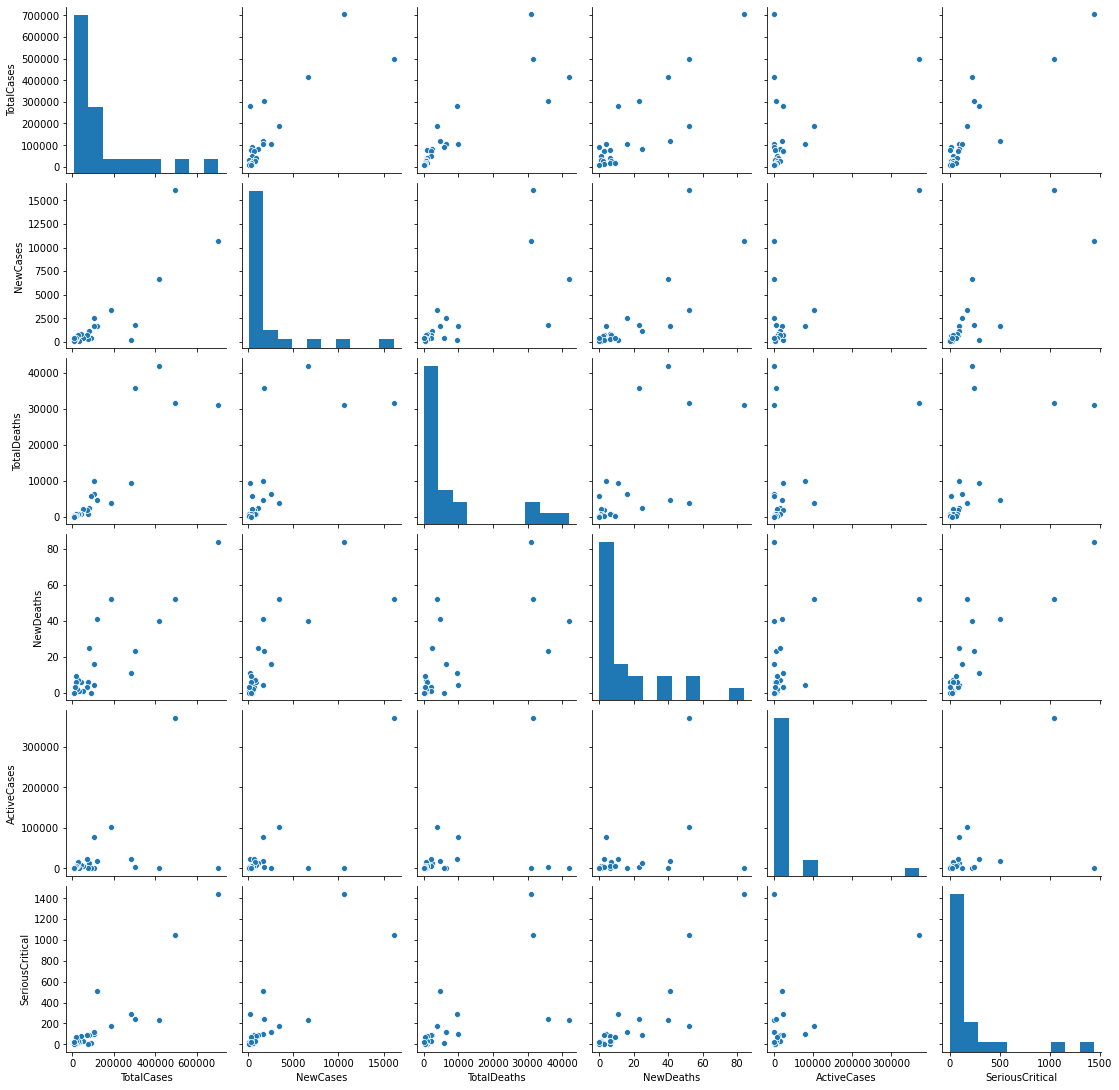

In [35]:
# Selecting columns from Covid19_EU dataframe and creating 'RelEUC' dataframe for investigating
# relations between variables
RelEUC = Covid19_EU[['TotalCases','NewCases','TotalDeaths','NewDeaths','ActiveCases','SeriousCritical']]
# Creating a pairplot
sns.pairplot(RelEUC);

It is not expected to that table gives reasonable results because all six columns based on one variable; TotalCases. All other colums is related to this variable. Plus there are several outliers, meaning that there is a huge gap between countries in numbers. This table shows usefulness of 'pairplot' in showing correlation between variables.

In [36]:
# Showing number of cases across Europe
fig = px.bar(Covid19_EU, y='TotalCases', x='Country', text='TotalCases').update_xaxes(categoryorder='total ascending')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

This chart shows only number of cases in Europe, but it does not show much thing alone. These numbers should be considered along with total population, area, and number of recovered population for making a scientific assumption about corona virus situation in a country.

In [37]:
# Selecting biweekly number of cases data and creation of a new dataframe; 'COV19_BW'
COV19_BW =Covid19_EU.drop(Covid19_EU.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1)

In [38]:
# Checking column names of the new dataframe showing biweekly number of cases in Europe
COV19_BW.columns

Index(['Country', '16/01/2020', '01/02/2020', '16/02/2020', '01/03/2020',
       '16/03/2020', '01/04/2020', '16/04/2020', '01/05/2020', '16/05/2020',
       '01/06/2020', '16/06/2020', '01/07/2020', '16/07/2020', '01/08/2020',
       '16/08/2020', '01/09/2020', '16/09/2020'],
      dtype='object')

In [39]:
# Transposing of dataframe for having a tidy data table
COV19_BWT = COV19_BW.T
COV19_BWT.columns = COV19_BWT.iloc[0]
COVBW = COV19_BWT[1:]

In [40]:
# Setting 'Date' column as index in the COVBW dataframe
COVBW['Date'] = COVBW.index

<ipython-input-40-a93367199764>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
# Converting 'Date' object to datetime object
COVBW['Date'] = pd.to_datetime(COVBW['Date'], format='%Y%m%d', errors='ignore')

<ipython-input-41-b00c38a9587f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Checking data types for COVBW table
COVBW.dtypes

Country
Spain             object
France            object
United Kingdom    object
Italy             object
Germany           object
Ukraine           object
Romania           object
Belgium           object
Netherlands       object
Sweden            object
Poland            object
Belarus           object
Portugal          object
Switzerland       object
Austria           object
Serbia            object
Denmark           object
Hungary           object
Bulgaria          object
Greece            object
Norway            object
Finland           object
Slovakia          object
Date              object
dtype: object

In [43]:
# Converting data types from object to integer
COVBW = COVBW.astype({"Spain": int, 
                  "France": int, 
                  "Italy": int, 
                  "Germany": int,
                  "United Kingdom": int,        
                  "Ukraine": int, 
                  "Romania": int, 
                  "Belgium": int, 
                  "Netherlands": int, 
                  "Sweden": int, 
                  "Poland": int,
                  "Belarus": int,
                  "Portugal": int,
                  "Switzerland": int,
                  "Serbia": int, 
                  "Denmark": int, 
                  "Hungary": int, 
                  "Bulgaria": int, 
                  "Greece": int, 
                  "Norway": int, 
                  "Finland": int, 
                  "Slovakia": int,
                  "Austria": int})

In [44]:
# The new dataframe
COVBW

Country      Spain  France  United Kingdom  Italy  Germany  Ukraine  Romania  \
16/01/2020       0       0               0      0        0        0        0   
01/02/2020       0       6               0      3        5        0        0   
16/02/2020       2       5              10      0       10        0        0   
01/03/2020      52      46              20    885       42        0        3   
16/03/2020    9731    4442            1736  20269     3738        3      110   
01/04/2020   94482   40051           27437  80582    58118      477     1839   
16/04/2020   78224   59023           67371  60749    65671     2892     4927   
01/05/2020   32692   24869           70098  41103    31535     6494     5099   
16/05/2020   15000   12914           53865  19505    14033     6981     4269   
01/06/2020    9246   10140           33375   9568     8330     6357     2886   
16/06/2020    4680    5724           16785   4325     4979     7950     2866   
01/07/2020    5162    7040           12366   3447     7798    12474     4314   
16/07/2020    8223    8117            8938   2908     5467    11143     7003   
01/08/2020   31028   14196            9822   3814     8972    14023    16006   
16/08/2020   54291   25638           14066   5651    14817    19078    18455   
01/09/2020  120045   65732           18100  15409    18866    31202    18739   
16/09/2020  140309  109309           36658  20543    19381    37723    17402   

Country     Belgium  Netherlands  Sweden  ...  Austria  Serbia  Denmark  \
16/01/2020        0            0       0  ...        0       0        0   
01/02/2020        0            0       0  ...        0       0        0   
16/02/2020        1            0       1  ...        0       0        0   
01/03/2020        0            2      10  ...        7       0        2   
16/03/2020     1540          957     983  ...      648      46      825   
01/04/2020    13756        10791    3366  ...     8963     739     1750   
16/04/2020    21229        15669    7468  ...     4616    3680     3934   
01/05/2020    13415        11383    9140  ...     1130    4259     2497   
16/05/2020     5797         4679    8442  ...      641    1650     1705   
01/06/2020     3179         2776    8980  ...      633    1007      920   
16/06/2020     1567         2526   13409  ...      400     929      560   
01/07/2020     1402         1440   15261  ...      628    1978      482   
16/07/2020     1645          923    6208  ...     1394    4695      310   
01/08/2020     6061         2817    3413  ...     1949    6230      664   
16/08/2020     8937         7822    4377  ...     1942    4020     1654   
01/09/2020     6753         8286    3177  ...     3986    2132     1321   
16/09/2020    11539        13250    3148  ...     6666    1072     3100   

Country     Hungary  Bulgaria  Greece  Norway  Finland  Slovakia        Date  
16/01/2020        0         0       0       0        0         0  16/01/2020  
01/02/2020        0         0       0       0        1         0  01/02/2020  
16/02/2020        0         0       0       0        0         0  16/02/2020  
01/03/2020        0         0       4       6        2         0  01/03/2020  
16/03/2020       31        41     224     901      207        44  16/03/2020  
01/04/2020      461       318     984    3319     1103       292  01/04/2020  
16/04/2020     1087       354     958    2340     1848       499  16/04/2020  
01/05/2020     1196       734     406    1101     1745       556  01/05/2020  
16/05/2020      642       653     194     508     1239        86  16/05/2020  
01/06/2020      450       413     145     236      681        44  01/06/2020  
16/06/2020      209       777     206     195      278        27  16/06/2020  
01/07/2020       69      1541     269     209      105       117  01/07/2020  
16/07/2020      118      2814     493     129       84       243  16/07/2020  
01/08/2020      242      3775     518     188      130       357  01/08/2020  
16/08/2020      348    

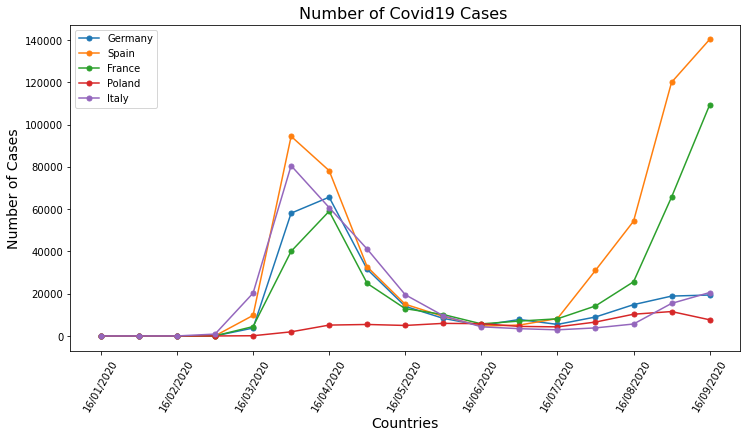

In [45]:
# Creating a line charth which shows biweekly number of cases in five most populated countries
# in western Europe
ax = COVBW.plot(x='Date', y=['Germany','Spain','France','Poland','Italy'], figsize=(12,6), marker ='.', markersize=10)
plt.legend(loc='upper left')
ax.set_ylabel('Number of Cases',fontsize = 14)
ax.set_xlabel('Countries', fontsize = 14)
ax.set_title('Number of Covid19 Cases ',fontsize = 16)
plt.xticks(rotation=60);

This is a basic line chart which shows number of cases for 15 days in 5 most populated countries of Europe. All around the world there were almost 0 case reported as corona except China. From the beginning March corona cases increased drastically in some countries like Italy, France, and Spain. Biweekly cases became very low at the middle of May and it stayed low until the middle July-2020. After this date corona cases escalated very fast and situation became worse than April in September.

In [46]:
#Biweekly number of cases in five most populated countries in Europe
fig = px.histogram(COVBW, x = 'Date', y=["France",'Spain','Italy','United Kingdom','Germany'])
fig.update_layout(
    title={
        'text': "Number of Cases in Five Most Populated\nEuropean Countries",
        'y':0.92,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

This figure was created based on biweekly number of cases like the prior figure. The usefulness of this figure is it is possible to make comparison between countries based on colors and legend.

In [47]:
#Biweekly number of cases in Scandinavia
fig = px.histogram(COVBW, x = 'Date', y=["Norway",'Sweden','Denmark','Finland'])
fig.update_layout(
    title={
        'text': "Number of Cases Countries in Scandiavia",
        'y':0.92,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

This figure shows biweekly number of cases in Scandinavia. According to figure number of cases is the highest in Sweden and lowest in Finland. Number of cases dropped from the middle of April to beginning of June. Numbers increased in June again and decreased after June again. This strange June increase is shown in only one country: Sweden.

## Corona Maps
It is aimed to create maps based on corona situation in the world. Therefore some relevant libraries were installed.

In [48]:
#import libraries
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [49]:
country=list(df2['Country'])
totalcases=list(df2['TotalCases'])

In [50]:
list1 = [[country[i],totalcases[i]] for i in range(len(country))] 
map_1 = Map(init_opts=opts.InitOpts(width='1000px', height='460px',theme=ThemeType.ROMANTIC)) 
map_1.add('Total Confirmed Cases', 
 list1,
 maptype='world',
 is_map_symbol_show=False)
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) 
map_1.set_global_opts(
visualmap_opts=opts.VisualMapOpts(max_=1100000,is_piecewise=True,pieces=[
 {'min': 500000},
 {'min': 200000, 'max': 499999},
 {'min': 100000, 'max': 199999},
 {'min': 50000, 'max': 99999},
 {'min': 10000, 'max': 49999},
 {'max': 9999},]),
 title_opts=opts.TitleOpts(
 title='Covid-19 Worldwide Total Cases',
 subtitle='Till October 01st,2020',
 pos_left='center',
 padding=0,
 item_gap=2,
 title_textstyle_opts= opts.TextStyleOpts(color='darkblue',
 font_weight='bold',
 font_family='Courier New',
 font_size=30), 
 subtitle_textstyle_opts= opts.TextStyleOpts(color='grey',
 font_weight='bold',
 #font_family='Courier New’,
 font_size=13)), 
 legend_opts=opts.LegendOpts(is_show=False))
map_1.render_notebook()

/Users/fmiller/opt/anaconda3/lib/python3.8/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning:

pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)



In this step a Total Death map was created. For having a more 

In [51]:
# Dropping 'WorldTotal' row 
dfm = df.drop([194])

In [52]:
# Importing necessary libraries
import plotly.express as px
import plotly.graph_objs as go

In [53]:
#Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = dfm['Country'],
    locationmode = 'country names',
    z = dfm['TotalDeaths'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Total Deaths as of September 28, 2020',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

This map clearly shows that USA, Brazil, India, and Mexico are the countries where people died most.

In [54]:
dfm.columns

Index(['Country', 'Continent', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical',
       'TotCases/1MPop', 'Deaths/1MPop', 'TotalTests', 'Tests/1MPop',
       'Population'],
      dtype='object', name=0)

In [55]:
#Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = dfm['Country'],
    locationmode = 'country names',
    z = dfm['TotCases/1MPop'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Number of Infected People in One Million Population <br> as of September 28, 2020',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

This map gives more information about infection rate of COVID-19. According to this map infected people are more common in USA and  most of South American countries.
The biggest problem of this corona dataset should always be considered: reliability of data which is given by country officials. It means data come from different countries do not have same degree of trustworthiness.

### Question 3

3. Explore Exam_Data (csv is provided) and address the following five questions:
a. Read the csv file into a Pandas DataFrame.
b. Explore, clean and transform the dataset if necessary. Handle missing values using different data strategies. Justify your choices.
c. Calculate additional measures like BMI.
d. Perform Exploratory Data Analysis, plot visualizations using Seaborn (e.g. scatter plot, Box-Whisker plot, Pair plot, Correlation Matrix, violin plot, etc.) and explainyour interpretations.
e. Employ multi-linear regression and kNN algorithm to predict the weight of the person. Discuss and explain the results.

In [186]:
# Reading the data set
ED = pd.read_csv('Exam_Data.csv')

In [187]:
# Checking the new dataframe
ED.head(10)

Age     Sex  Weight  Height
0 30.0  Female    70.4   177.0
1 30.0    Male    78.0   182.0
2 32.0  Female    63.2   169.0
3 32.0  Female    63.2   169.0
4 32.0    Male    69.2   174.0
5 32.0    Male    69.2   174.0
6 33.0  Female    59.6   165.0
7 33.0    Male    64.8   170.0
8 34.0  Female    63.2   169.0
9 34.0    Male    69.2   174.0

In [188]:
# Checking data types of the dataframe
ED.dtypes

Age       float64
Sex        object
Weight    float64
Height    float64
dtype: object

In [189]:
# Finding rows with NaN values
is_NaN = ED.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ED[row_has_NaN]
print(rows_with_NaN)

      Age     Sex  Weight  Height
32   36.0    Male     nan     nan
33   36.0  Female     nan     nan
52   37.0  Female     nan   159.0
53   37.0    Male     nan   164.0
54   37.0    Male     nan   167.0
55   37.0    Male     nan   167.0
111  39.0    Male     nan   161.0
155  40.0    Male     nan   167.0
218  41.0    Male     nan   161.0
219  41.0    Male     nan   166.0
371  43.0    Male     nan   167.0
372  43.0    Male     nan     nan
373  43.0  Female     nan     nan
449  44.0    Male     nan   166.0
524  45.0    Male     nan   166.0
525  45.0    Male     nan   166.0
606  46.0    Male     nan   167.0
607  46.0    Male     nan   167.0
759  48.0    Male     nan   166.0
861  50.0    Male     nan   161.0
862  50.0    Male     nan   167.0
863  50.0    Male     nan   167.0
985  54.0    Male     nan   166.0
1004  nan  Female    59.6   165.0
1005  nan  Female    63.2   169.0
1006  nan    Male    64.8   170.0
1007  nan    Male    69.2   174.0


First of all NaN values were replaced with numerica values or strings. Age column is sorted and usually an age group is repeated two time. Therefore the first two values were replaced with 61 and the other two were replaced with 62 consequently.

In [190]:
# Replacing values
ED.iloc[[1004], [0]] = 61
ED.iloc[[1005], [0]] = 61
ED.iloc[[1006], [0]] = 62
ED.iloc[[1007], [0]] = 62

At the second step NaN values in Weight column were handled considering Age, Sex, and Height columns. The strategy was to find a row with the same values except Weight and take mean values of the selected rows. If there was not any row with the same three values, Age variable was eliminated and the the other two variables were considered. If it requires only Height variable or one of the other three variables were considered. Even if there was not any same value, age and height values were increased 1.

In [191]:
# Finding mean values for missing Weight values
row32Weight = ED[(ED['Age'] == 36.0) & (ED['Sex'] == 'Female')].Weight.mean() 
row33Weight = ED[(ED['Age'] == 36.0) & (ED['Sex'] == 'Male')].Weight.mean() 
row52Weight = ED[ ED['Height'] == 160.0].Weight.mean()
row53Weight = ED[(ED['Height'] == 164.0)].Weight.mean() 
row54Weight = ED[(ED['Height'] == 167.0)].Weight.mean() 
row55Weight = ED[(ED['Height'] == 167.0)].Weight.mean()
row111Weight = ED[(ED['Sex'] == 'Female') & (ED['Height'] == 167.0)].Weight.mean()
row155Weight = ED[(ED['Height'] == 167.0)].Weight.mean()
row218Weight = ED[(ED['Age'] == 41.0) & (ED['Height'] == 161.0)].Weight.mean()
row219Weight = ED[(ED['Height'] == 166.0)].Weight.mean()
row371Weight = ED[(ED['Age'] == 43.0) & (ED['Height'] == 167.0)].Weight.mean()
row372Weight = ED[(ED['Age'] == 43.0) & (ED['Sex'] == 'Male')].Weight.mean()
row373Weight = ED[(ED['Age'] == 43.0) & (ED['Sex'] == 'Female')].Weight.mean()
row449Weight = ED[(ED['Age'] == 44.0) & (ED['Height'] == 166.0)].Weight.mean()
row524Weight = ED[(ED['Age'] == 45.0) & (ED['Height'] == 166.0)].Weight.mean()
row525Weight = ED[(ED['Age'] == 45.0) & (ED['Height'] == 166.0)].Weight.mean()
row606Weight = ED[(ED['Age'] == 46.0)  & (ED['Height'] == 167.0)].Weight.mean()
row607Weight = ED[(ED['Age'] == 46.0)  & (ED['Height'] == 167.0)].Weight.mean()
row759Weight = ED[(ED['Age'] == 48.0) & (ED['Height'] == 166.0)].Weight.mean()
row861Weight = ED[(ED['Height'] == 161.0)].Weight.mean()
row862Weight = ED[(ED['Age'] == 50.0)  & (ED['Height'] == 167.0)].Weight.mean()
row863Weight = ED[(ED['Age'] == 50.0)  & (ED['Height'] == 167.0)].Weight.mean()
row985Weight = ED[(ED['Height'] == 166.0)].Weight.mean()

In [192]:
# Rounding up new Weight values
r32W = round(row32Weight, 1)
r33W = round(row33Weight, 1)
r52W = round(row52Weight, 1)
r53W = round(row53Weight, 1)
r54W = round(row54Weight, 1)
r55W = round(row55Weight, 1)
r111W = round(row111Weight, 1)
r155W = round(row155Weight, 1)
r218W = round(row218Weight, 1)
r219W = round(row219Weight, 1)
r371W = round(row371Weight, 1)
r372W = round(row372Weight, 1)
r373W = round(row373Weight, 1)
r449W = round(row449Weight, 1)
r524W = round(row524Weight, 1)
r525W = round(row525Weight, 1)
r606W = round(row606Weight, 1)
r607W = round(row607Weight, 1)
r759W = round(row759Weight, 1)
r861W = round(row861Weight, 1)
r862W = round(row862Weight, 1)
r863W = round(row863Weight, 1)
r985W = round(row985Weight, 1)

In [193]:
# Replacing new Weight values with corresponding NaN values
ED.iloc[[32], [2]] = r32W
ED.iloc[[33], [2]] = r33W
ED.iloc[[52], [2]] = r52W
ED.iloc[[53], [2]] = r53W
ED.iloc[[54], [2]] = r54W
ED.iloc[[55], [2]] = r55W
ED.iloc[[111], [2]] = r111W
ED.iloc[[155], [2]] = r155W
ED.iloc[[218], [2]] = r218W
ED.iloc[[219], [2]] = r219W
ED.iloc[[371], [2]] = r371W
ED.iloc[[372], [2]] = r372W
ED.iloc[[373], [2]] = r373W
ED.iloc[[449], [2]] = r449W
ED.iloc[[524], [2]] = r524W
ED.iloc[[525], [2]] = r525W
ED.iloc[[606], [2]] = r606W
ED.iloc[[607], [2]] = r607W
ED.iloc[[759], [2]] = r759W
ED.iloc[[861], [2]] = r861W
ED.iloc[[862], [2]] = r862W
ED.iloc[[863], [2]] = r863W
ED.iloc[[985], [2]] = r985W

Prior strategy was applied for finding missing Height values. 

In [194]:
# Finding mean values for missing Height values
row32Height = ED[(ED['Age'] == 36.0) & (ED['Sex'] == 'Female')].Height.mean() 
row33Height = ED[(ED['Age'] == 36.0) & (ED['Sex'] == 'Male')].Height.mean() 
row372Height = ED[(ED['Age'] == 43.0) & (ED['Sex'] == 'Male')].Height.mean()
row373Height = ED[(ED['Age'] == 43.0) & (ED['Sex'] == 'Female')].Height.mean()

In [195]:
# Rounding up new Height values
r32H = round(row32Height, 1)
r33H = round(row33Height, 1)
r372H = round(row372Height, 1)
r373H = round(row373Height, 1)

In [196]:
# Replacing new Weight values with corresponding NaN values
ED.iloc[[32], [3]] = r32H
ED.iloc[[33], [3]] = r33H
ED.iloc[[372], [3]] = r372H
ED.iloc[[373], [3]] = r373H

In [197]:
# Checking if there is any NaN value left in the dataframe
ED.isnull().sum()

Age       0
Sex       0
Weight    0
Height    0
dtype: int64

NaN values could be replaced by column means but that is the easiest way. I believe my method is more scientific.

### Creating New Columns for ED dataframe

In [199]:
def BMI(ED):
    return ED['Weight'] / (ED['Height']/100)**2

ED['BMI'] = ED.apply(BMI, axis=1)

In [200]:
# Changing display format for not displaying more than one decimal place in BMI column
pd.options.display.float_format = '{:,.1f}'.format

In [201]:
# Checking the dataframe
ED

Age     Sex  Weight  Height  BMI
0    30.0  Female    70.4   177.0 22.5
1    30.0    Male    78.0   182.0 23.5
2    32.0  Female    63.2   169.0 22.1
3    32.0  Female    63.2   169.0 22.1
4    32.0    Male    69.2   174.0 22.9
...   ...     ...     ...     ...  ...
1003 60.0    Male    70.3   175.0 23.0
1004 61.0  Female    59.6   165.0 21.9
1005 61.0  Female    63.2   169.0 22.1
1006 62.0    Male    64.8   170.0 22.4
1007 62.0    Male    69.2   174.0 22.9

[1008 rows x 5 columns]

In [202]:
# Creating of 'WeightClass' column based on BMI values
ED["BMIClass"] = np.nan
ED["BMIClass"] = ED['BMI'].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if x<25 else ('Overweight' if x<30 else 'Obese')))

In [203]:
ED.head()

Age     Sex  Weight  Height  BMI BMIClass
0 30.0  Female    70.4   177.0 22.5   Normal
1 30.0    Male    78.0   182.0 23.5   Normal
2 32.0  Female    63.2   169.0 22.1   Normal
3 32.0  Female    63.2   169.0 22.1   Normal
4 32.0    Male    69.2   174.0 22.9   Normal

In this step a 'Grades' list was created from float values and this list was added to ED dataframe later on.

In [204]:
ED.shape

(1008, 6)

In [205]:
# Creating a random float list
import random

randomFloatList = []
# Set a length of the list to 1008
for i in range(0, 1008):
    # any random float between 40 to 90
    x = round(random.uniform(40, 90), 1)
    randomFloatList.append(x)

In [206]:
# Adding the list to the dataframe as a column
ED['Grades'] = randomFloatList

In [207]:
# Checking the new data frame
ED

Age     Sex  Weight  Height  BMI BMIClass  Grades
0    30.0  Female    70.4   177.0 22.5   Normal    52.7
1    30.0    Male    78.0   182.0 23.5   Normal    65.2
2    32.0  Female    63.2   169.0 22.1   Normal    45.9
3    32.0  Female    63.2   169.0 22.1   Normal    79.3
4    32.0    Male    69.2   174.0 22.9   Normal    48.4
...   ...     ...     ...     ...  ...      ...     ...
1003 60.0    Male    70.3   175.0 23.0   Normal    62.8
1004 61.0  Female    59.6   165.0 21.9   Normal    60.4
1005 61.0  Female    63.2   169.0 22.1   Normal    64.2
1006 62.0    Male    64.8   170.0 22.4   Normal    47.2
1007 62.0    Male    69.2   174.0 22.9   Normal    42.4

[1008 rows x 7 columns]

In this step a 'Result' column which has Pass-Fail values was created based on 'Grades' column.

In [208]:
# Creating a new 'Result' column and adding it to ED dataframe
result = [] 
for value in ED["Grades"]: 
    if value < 60: 
        result.append("Fail") 
    else: 
        result.append("Pass") 
       
ED["Result"] = result 

In [209]:
# Checking the new data frame
ED

Age     Sex  Weight  Height  BMI BMIClass  Grades Result
0    30.0  Female    70.4   177.0 22.5   Normal    52.7   Fail
1    30.0    Male    78.0   182.0 23.5   Normal    65.2   Pass
2    32.0  Female    63.2   169.0 22.1   Normal    45.9   Fail
3    32.0  Female    63.2   169.0 22.1   Normal    79.3   Pass
4    32.0    Male    69.2   174.0 22.9   Normal    48.4   Fail
...   ...     ...     ...     ...  ...      ...     ...    ...
1003 60.0    Male    70.3   175.0 23.0   Normal    62.8   Pass
1004 61.0  Female    59.6   165.0 21.9   Normal    60.4   Pass
1005 61.0  Female    63.2   169.0 22.1   Normal    64.2   Pass
1006 62.0    Male    64.8   170.0 22.4   Normal    47.2   Fail
1007 62.0    Male    69.2   174.0 22.9   Normal    42.4   Fail

[1008 rows x 8 columns]

### Exploratory Data Analysis with Seaborn

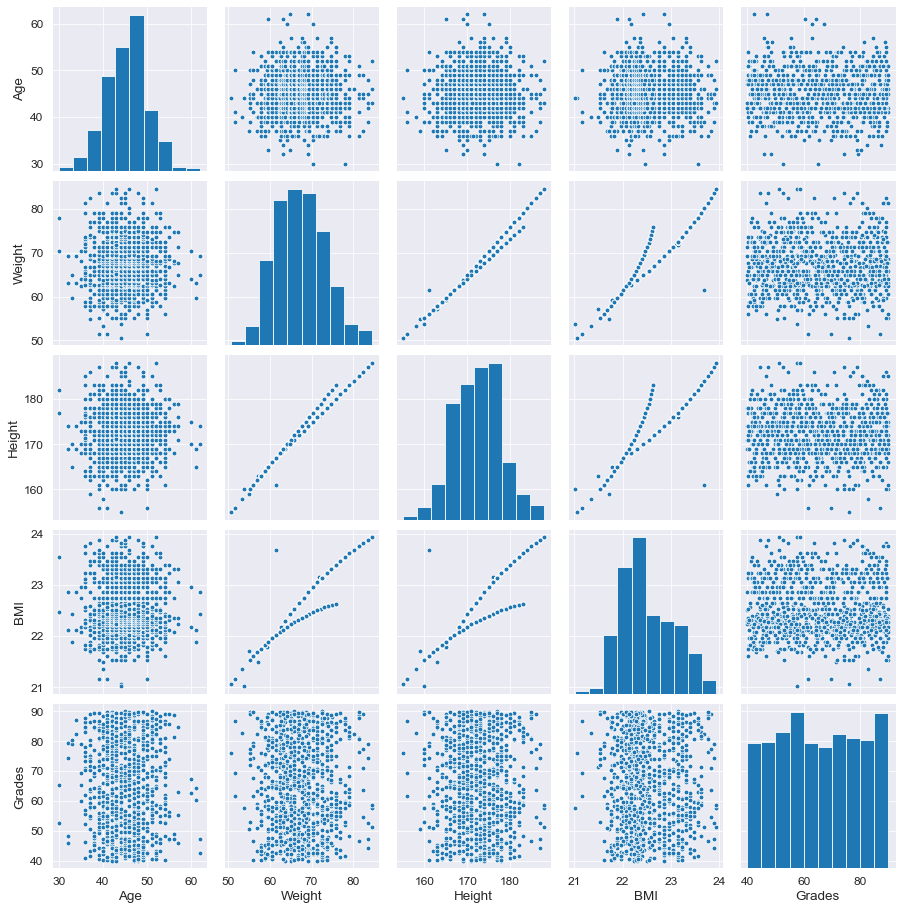

In [210]:
# Creating pairplot
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
sns.pairplot(ED);

This figure shows us there is a strong relationships between BMI-Height and BMI-Weight. Because BMI data was produced from Height and Weight variables. There is a very week relationships between the other variables. Obviously it is not reasonable to be a relationship between Grades and Weight.

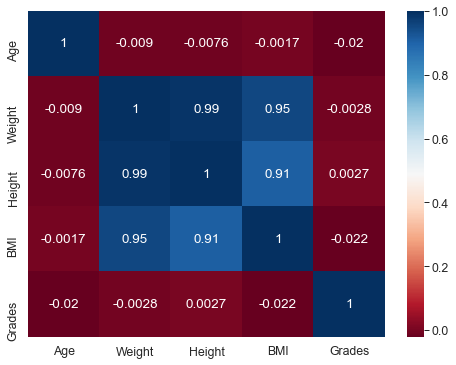

In [211]:
# Creating heatmap which show correlation values with seaborn
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize = (8,6))
sns.set_context('paper', font_scale = 1.4)
ED_mx = ED.corr()
sns.heatmap(ED_mx, annot = True, cmap = 'RdBu');

The heatmap shows basically the same with pairplot. It shows strong relationships between BMI-Height and BMI-Weight, and terrible relationship values between the other variables.

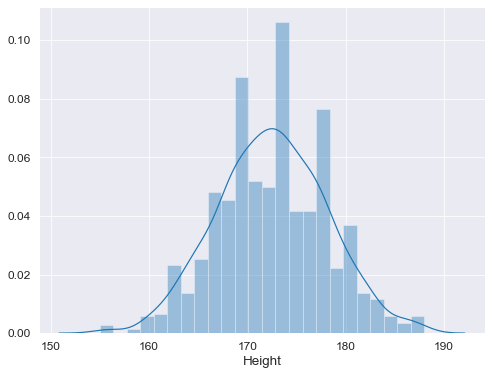

In [212]:
# Creating a distribution plot
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.figure(figsize = (8,6))
sns.distplot(ED['Height']);

This chart show distribution of Height values and it looks like normal curve except a few outliers.

<Figure size 576x432 with 0 Axes>

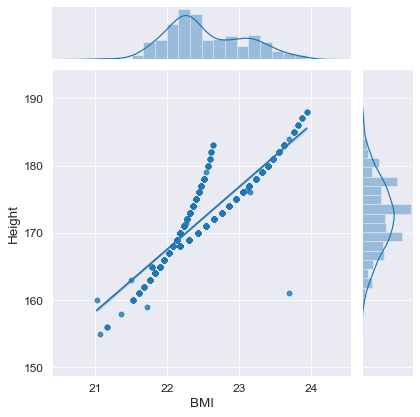

In [213]:
# Creating joint plot
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
sns.jointplot(x = 'BMI', y = 'Height', data = ED, kind = 'reg');

Joint plot shows both correlation between two variables and distribution of these variables. According to this chart there is a strom relationship between Height and BMI values.

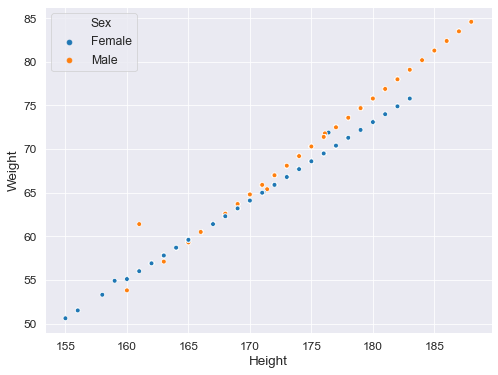

In [214]:
# Creating scatterplot
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Height', y = 'Weight', data = ED, hue = 'Sex');

According to this chart there is a strong correlation between Height and Weight variables. Also males are longer than females.

<Figure size 576x432 with 0 Axes>

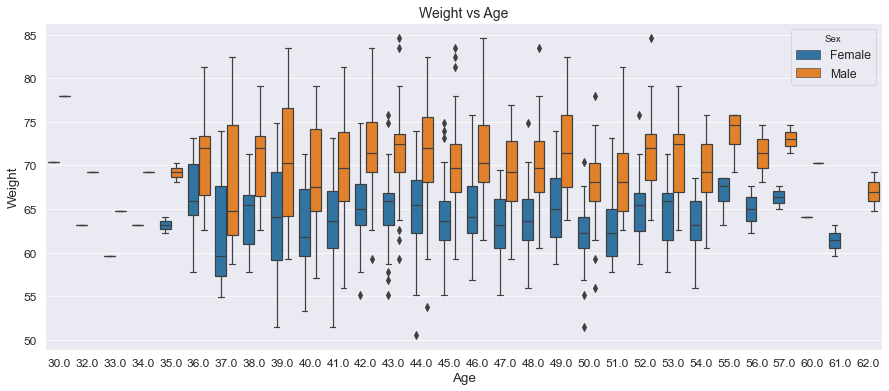

In [215]:
# Creating boxplot
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.figure(figsize = (8,6))
plt.figure(figsize = (15,6))
plt.title('Weight vs Age', fontsize = 14)
sns.boxplot(x= 'Age', y = 'Weight', data = ED, hue = 'Sex');

This figure shows distribution of Weight values according to Age variable. Boxes and whiskers are very big most of the time and that means data is very unstable. We can say that there is no relationship between Age and Weight. After age of 55 data becomes more stable but probly it comes from less amount of observations. And males are heavier than females.

<Figure size 576x432 with 0 Axes>

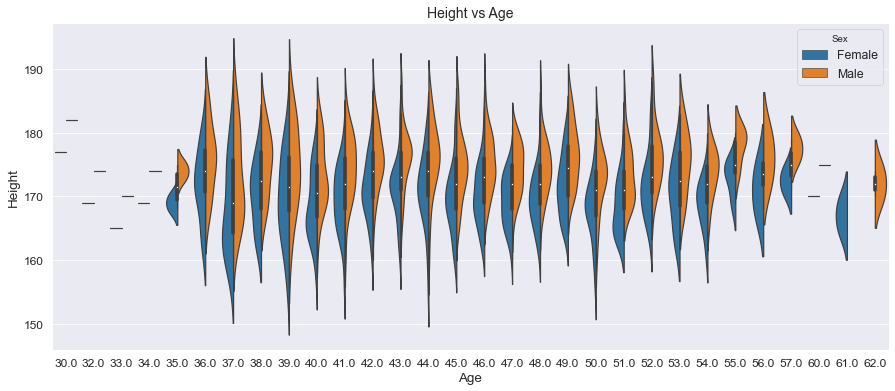

In [216]:
# Creating a violinplot
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.figure(figsize = (8,6))
plt.figure(figsize = (15,6))
plt.title('Height vs Age', fontsize = 14)
sns.violinplot(x = 'Age', y = 'Height', data = ED, hue = 'Sex',split = True);

This violin plot shows relationships between Age and Height variables which is very low. And we can say that data is very unstable and males are usually longer than females.

### Employ multi-linear regression and kNN algorithm to predict the weight of the person. Discuss and explain the results.

In [217]:
# Importing necessary libraries
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [218]:
# Creating a new dataframe
EDR = ED

In [221]:
# Creating of 'WeightClass' column based on BMI values
EDR['SexClass'] = np.where(EDR['Sex'] == 'Male', 0, 1)

In [222]:
EDR.head()

Age     Sex  Weight  Height  BMI BMIClass  Grades Result  SexClass
0 30.0  Female    70.4   177.0 22.5   Normal    52.7   Fail         1
1 30.0    Male    78.0   182.0 23.5   Normal    65.2   Pass         0
2 32.0  Female    63.2   169.0 22.1   Normal    45.9   Fail         1
3 32.0  Female    63.2   169.0 22.1   Normal    79.3   Pass         1
4 32.0    Male    69.2   174.0 22.9   Normal    48.4   Fail         0

In [223]:
# sklearn works with numpy arrays. Therefore colums, used for regression, were converted to numpy arrays.
EDR.iloc[:,[0,2,3,4,6,8]].values

array([[ 30.        ,  70.4       , 177.        ,  22.47119282,
         52.7       ,   1.        ],
       [ 30.        ,  78.        , 182.        ,  23.54788069,
         65.2       ,   0.        ],
       [ 32.        ,  63.2       , 169.        ,  22.12807675,
         45.9       ,   1.        ],
       ...,
       [ 61.        ,  63.2       , 169.        ,  22.12807675,
         64.2       ,   1.        ],
       [ 62.        ,  64.8       , 170.        ,  22.42214533,
         47.2       ,   0.        ],
       [ 62.        ,  69.2       , 174.        ,  22.8563879 ,
         42.4       ,   0.        ]])

Multi Linear Regression

In [225]:
# Assignment of dependent and independent variables
XX = EDR[['Age', 'Height', 'BMI','Grades', 'SexClass']]
yy = EDR[['Weight']]

In [226]:
# Splitting test and train datasets
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = .25, random_state = 42)

In [227]:
# Linear Regression and fitting the model
model = linear_model.LinearRegression()
model.fit(XX_train,yy_train)

LinearRegression()

In [228]:
# Prediction model
yy_pred = model.predict(XX_test)

In [229]:
# Evaluating the model
y_expect2 = yy_test
y_pred2 = model.predict(XX_test)
print(metrics.r2_score(y_expect2, y_pred2))
print(metrics.mean_squared_error(y_expect2, y_pred2))

0.9986236507686969
0.05107566456926533


Multi linear regression calculates prediction values based on several variables. In this model r2 score is very close to 1 and mean squared error is very low. This high scores are usually very unlikely especially if there is only independent variables. I assume this high scores come from multi collinearity or overfitting problems.

KNN classifies values based on several variables. KNN Classifier will not make predictions for float values. Therefore BMIClass column was selected as dependent variable.

In [230]:
# Checking the data set
EDR

Age     Sex  Weight  Height  BMI BMIClass  Grades Result  SexClass
0    30.0  Female    70.4   177.0 22.5   Normal    52.7   Fail         1
1    30.0    Male    78.0   182.0 23.5   Normal    65.2   Pass         0
2    32.0  Female    63.2   169.0 22.1   Normal    45.9   Fail         1
3    32.0  Female    63.2   169.0 22.1   Normal    79.3   Pass         1
4    32.0    Male    69.2   174.0 22.9   Normal    48.4   Fail         0
...   ...     ...     ...     ...  ...      ...     ...    ...       ...
1003 60.0    Male    70.3   175.0 23.0   Normal    62.8   Pass         0
1004 61.0  Female    59.6   165.0 21.9   Normal    60.4   Pass         1
1005 61.0  Female    63.2   169.0 22.1   Normal    64.2   Pass         1
1006 62.0    Male    64.8   170.0 22.4   Normal    47.2   Fail         0
1007 62.0    Male    69.2   174.0 22.9   Normal    42.4   Fail         0

[1008 rows x 9 columns]

In [231]:
# Copying the data set with a different name
EDL = EDR

In [232]:
EDL.iloc[:,[0,2,3,4,6,8]].values

array([[ 30.        ,  70.4       , 177.        ,  22.47119282,
         52.7       ,   1.        ],
       [ 30.        ,  78.        , 182.        ,  23.54788069,
         65.2       ,   0.        ],
       [ 32.        ,  63.2       , 169.        ,  22.12807675,
         45.9       ,   1.        ],
       ...,
       [ 61.        ,  63.2       , 169.        ,  22.12807675,
         64.2       ,   1.        ],
       [ 62.        ,  64.8       , 170.        ,  22.42214533,
         47.2       ,   0.        ],
       [ 62.        ,  69.2       , 174.        ,  22.8563879 ,
         42.4       ,   0.        ]])

In [236]:
# Selecting relevant columns
ED_prime = EDL.filter(['Age','Weight','Height','Grades','SexClass'], axis=1)
y = EDL['BMIClass']

In [237]:
# Scaling of data
X = preprocessing.scale(ED_prime)

In [238]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [239]:
# Building and training the model
clf = neighbors.KNeighborsClassifier(n_neighbors = 8)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [240]:
# Evaluating the model
y_expect = y_test
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_expect, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       252

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

[[252]]


Accuracy value of the classifier is 1 which means 100%. This is absolutely unacceptable normally. The reason of this abnormal result is that we are predicting BMIClass and this value is already based on Height and Weight columns and these columns were being used as independent variables. This is a kind of classification of dependent variable with itself and this is unreasonable. 

* I prefer to change name of dataframe in every step because when codes were run more than once, dataframe can change. In that case I change names for securing prior codes, dataframes, and figures.